****RowNumber**** — represent to the row number. This column will be removed.

**CustomerID** — contains random and unique values. This column will be removed.

**Surname** — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

**CreditScore** — it is a score which shows the customer's credit behaviors. We will keep this column.

**Geography** — a customer’s location can affect their decision to leave the bank. We will keep this column.

**Gender** — it could be interesting to explore whether gender plays a role in a customer leaving the bank. 

**Age** — Age of the customer.

**Tenure** — refers to the number of years that the customer has been a client of the bank. 

**Balance** — Balance of the customers.

**NumOfProducts** — the number of products that a customer has purchased through the bank.

**HasCrCard** — indicates whether or not a customer has a credit card. (0=No,1=Yes)

**IsActiveMember** —  indicates whether or not a customer is active or not. (0=No,1=Yes)

**EstimatedSalary** — customer salary can has impact on their decision to leave the bank that's why we will keep it.

**Exited** — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold


from sklearn.metrics import roc_curve 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, f1_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Import Data

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# Check columns list and missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Get unique count for each variable
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

> Let's remove the features which has no impact on churn of the customers.

In [8]:
drop_list = [
'RowNumber',
'CustomerId',
'Surname'
]


df=df.drop(drop_list,axis=1)

In [9]:
df.shape

(10000, 11)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df["Exited"].replace(to_replace="C", value=1, inplace=True)
df["Exited"].replace(to_replace="N", value=0, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


# EDA

In [13]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

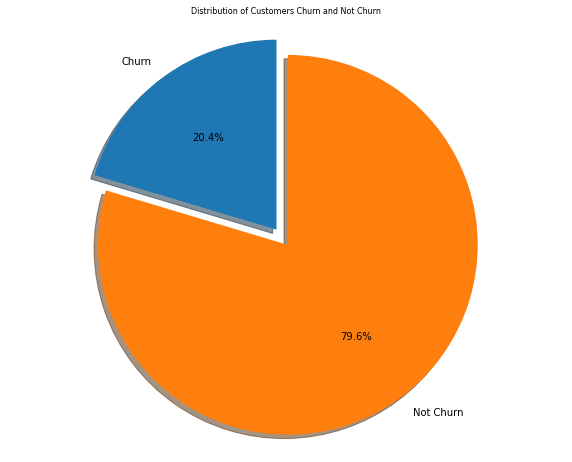

In [14]:
labels = 'Churn', 'Not Churn'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Distribution of Customers Churn and Not Churn", size = 8)
plt.show()

>  It seems that there is no balance between churn and not churn customers in the dataset. When we are developing a model, we have to take into consideration this situation.

### Numerical Features

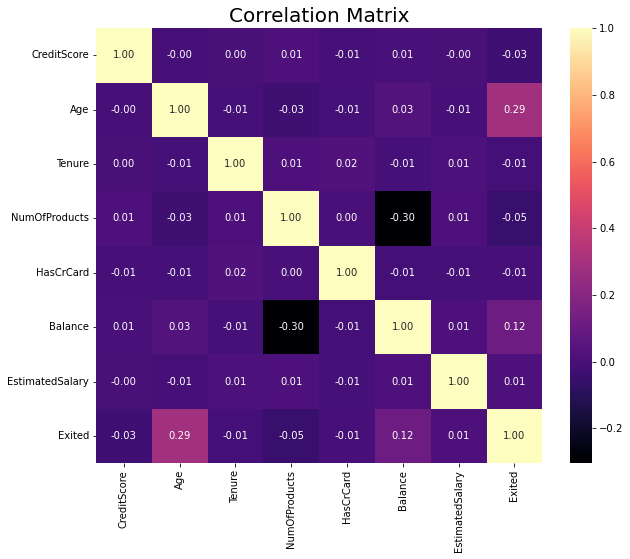

In [15]:
# Correlation Matrix for Numerical Features
f, ax = plt.subplots(figsize= [10,8])
g = sns.heatmap(df[["CreditScore","Age","Tenure","NumOfProducts","HasCrCard","Balance", "EstimatedSalary", "Exited"]].corr(),annot=True, fmt = ".2f", ax=ax, cmap = "magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

> It seems that there is no correlation between numerical features.

#### Age

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


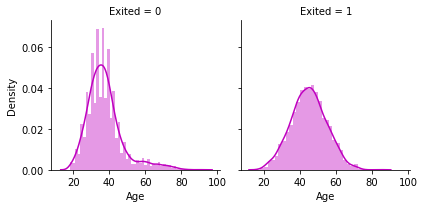

In [16]:
g = sns.FacetGrid(df, col='Exited')
g = g.map(sns.distplot, "Age", color="m")

#### Balance

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


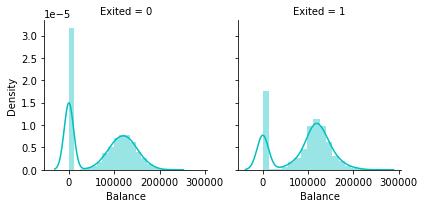

In [17]:
g = sns.FacetGrid(df, col='Exited')
g = g.map(sns.distplot, "Balance", color="c")

### Cathegorical Features

### Geography

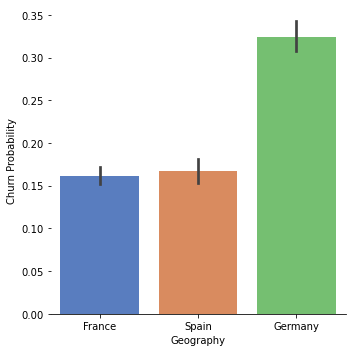

In [18]:
g = sns.catplot(x="Geography",y="Exited", data=df, kind="bar", height = 5 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Churn Probability")

### Gender

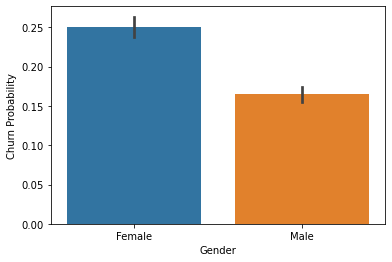

In [19]:
g = sns.barplot(x="Gender",y="Exited",data=df)
g = g.set_ylabel("Churn Probability")

### Missing Values

In [20]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

> There is no missing value in the dataset. 

### Outlier Detection

In [21]:
# Outlier detection 

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, Balance, Duration
Outliers_to_drop = detect_outliers(df,2,["CreditScore","Age","Tenure", "Balance", "NumOfProducts", "EstimatedSalary"])

We applied Tukey Method to remove outliers from dataset. Let's remove them!

In [22]:
# Drop outliers
df = df.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

### Convert Data Format

> Let's convert long format to wide format.

In [23]:
df = pd.get_dummies(df)

df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


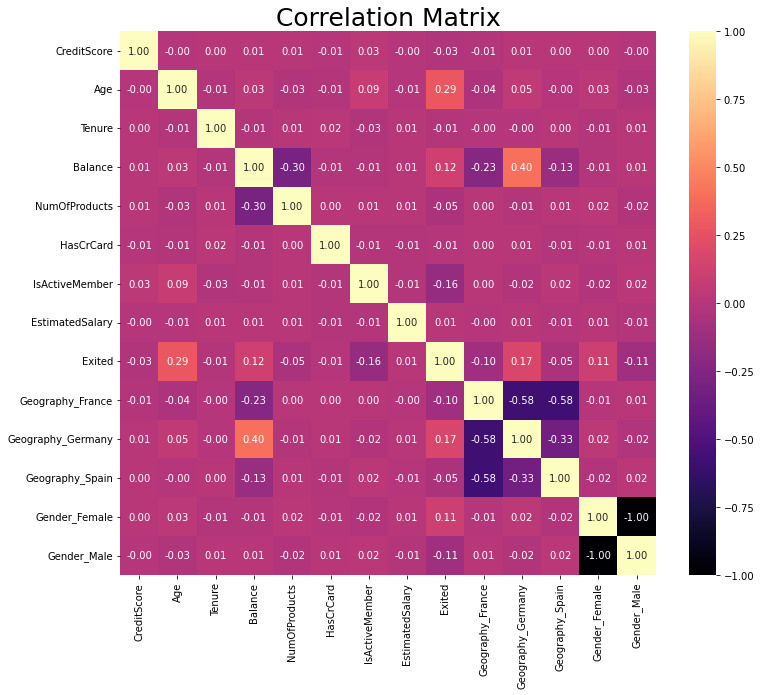

In [24]:
# Correlation Matrix for Wide Format Data
f, ax = plt.subplots(figsize= [12,10])
g = sns.heatmap(df.corr(),annot=True, fmt = ".2f", ax=ax, cmap = "magma")
ax.set_title("Correlation Matrix", fontsize=25)
plt.show()

In [25]:
y = df["Exited"]

X = df.drop(labels = ["Exited"],axis = 1)

# Model

In [26]:
# Splitting data into testing and training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1992)

### Oversampling

In [27]:
from imblearn.over_sampling import SMOTE

In [31]:
smote = SMOTE(random_state=42, k_neighbors=5, sampling_strategy=1)
X_train_smo, y_train_smo = smote.fit_resample(X_train, y_train)

In [32]:
y_train.value_counts()

0    5573
1    1427
Name: Exited, dtype: int64

In [33]:
y_train_smo.value_counts()

1    5573
0    5573
Name: Exited, dtype: int64

### Cross Validation

In [34]:
# Cross validate model with Kfold stratified cross validation
kfold = StratifiedKFold(n_splits=5)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


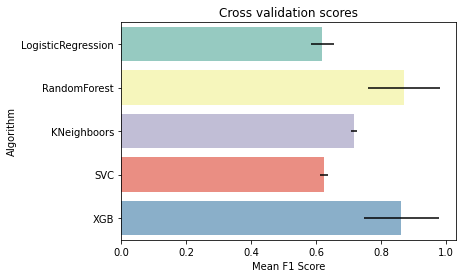

In [35]:
# Modeling step Test differents algorithms 
random_state = 1992
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(RandomForestClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC())
classifiers.append(XGBClassifier())


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train_smo, y = y_train_smo, scoring = "f1", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","RandomForest","KNeighboors","SVC","XGB"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean F1 Score")
g = g.set_title("Cross validation scores")

#### Logistic Regression

In [36]:
# LogisticRegression

LR = LogisticRegression()

param_grid = {
                  "C":np.logspace(-3,3,7), 
                  "penalty":["l1","l2"]
}

gs_LR = GridSearchCV(LR, param_grid = param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gs_LR.fit(X_train_smo,y_train_smo)


Fitting 5 folds for each of 14 candidates, totalling 70 fits


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueErr

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             scoring='f1', verbose=1)

In [37]:
y_pred = gs_LR.predict(X_test)

In [38]:
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.64      0.75      2390
           1       0.33      0.69      0.45       610

    accuracy                           0.65      3000
   macro avg       0.61      0.67      0.60      3000
weighted avg       0.78      0.65      0.69      3000


Confusion Matrix:
[[1538  852]
 [ 187  423]]


#### Random Forest

In [39]:
# RandomForest 

RFC = RandomForestClassifier()


param_grid = {
              "max_depth": [4,5,7],
              "max_features": [1, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[80,100,120],
              "criterion": ["gini"]
}


gs_RFC = GridSearchCV(RFC,param_grid = param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)

gs_RFC.fit(X_train_smo,y_train_smo)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [4, 5, 7], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'n_estimators': [80, 100, 120]},
             scoring='f1', verbose=1)

In [40]:
y_pred = gs_RFC.predict(X_test)

In [41]:
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      2390
           1       0.57      0.60      0.59       610

    accuracy                           0.83      3000
   macro avg       0.74      0.74      0.74      3000
weighted avg       0.83      0.83      0.83      3000


Confusion Matrix:
[[2117  273]
 [ 243  367]]


#### KNeighboors

In [42]:
# KNeighbors

KNN = KNeighborsClassifier()

k_grid={
        'n_neighbors':np.arange(2,20)
}

gs_KNN=GridSearchCV(KNN, k_grid, cv=kfold, refit=True, n_jobs=4)

gs_KNN.fit(X_train_smo,y_train_smo)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])})

In [43]:
y_pred = gs_KNN.predict(X_test)

In [44]:
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.61      0.69      2390
           1       0.20      0.38      0.26       610

    accuracy                           0.56      3000
   macro avg       0.50      0.50      0.48      3000
weighted avg       0.67      0.56      0.60      3000


Confusion Matrix:
[[1454  936]
 [ 377  233]]


#### SVC

In [45]:
# SVC
SVM = SVC()


param_grid = {
                'C': [0.1, 1, 10], 
                'gamma': [0.01, 0.1, 1],
                'kernel': ['rbf']
}

gs_SVM = GridSearchCV(SVM, param_grid, cv=kfold, n_jobs=4)

gs_SVM.fit(X_train_smo,y_train_smo)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf']})

In [46]:
y_pred = gs_SVM.predict(X_test)

In [47]:
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      2390
           1       0.11      0.00      0.01       610

    accuracy                           0.79      3000
   macro avg       0.45      0.50      0.44      3000
weighted avg       0.66      0.79      0.71      3000


Confusion Matrix:
[[2373   17]
 [ 608    2]]


#### XGB

In [48]:
# XGB

XGB = XGBClassifier()

param_grid = {
                'n_estimators': [50,80,100,120], 
                'gamma': [0.01,0.001,0.001], 
                'max_depth': [5,6,7,8],
                'min_child_weight': [1,5,8,10], 
                'learning_rate': [0.05,0.1,0.2]
}

gs_XGB = GridSearchCV(estimator = XGB, param_grid =  param_grid,  cv=kfold, n_jobs=4)

gs_XGB.fit(X_train_smo,y_train_smo)

C:\Users\ASUS\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:17:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, mi...
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                           

In [49]:
y_pred = gs_XGB.predict(X_test)

In [50]:
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2390
           1       0.62      0.57      0.59       610

    accuracy                           0.84      3000
   macro avg       0.76      0.74      0.75      3000
weighted avg       0.84      0.84      0.84      3000


Confusion Matrix:
[[2182  208]
 [ 265  345]]


Let's look into a voting classifier to combine the predictions coming from the best 3 classifiers

In [51]:
# Ensemble Modeling
voting_clas = VotingClassifier(estimators=[('XGB', gs_XGB.best_estimator_),('extc', gs_LR.best_estimator_),('ada',gs_RFC.best_estimator_)], voting='soft', n_jobs=4)

voting_clas = voting_clas.fit(X_train_smo, y_train_smo)

In [52]:
y_pred = voting_clas.predict(X_test)

In [53]:
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test,y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2390
           1       0.60      0.62      0.61       610

    accuracy                           0.84      3000
   macro avg       0.75      0.76      0.75      3000
weighted avg       0.84      0.84      0.84      3000


Confusion Matrix:
[[2139  251]
 [ 233  377]]


It seems that ensemble model gives best scores. 